# ANALISIS DE DATOS - APRENDIZAJE NO SUPERVISADO

In [40]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings   # Mensajes de advertencia 
warnings.filterwarnings('ignore')

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

In [43]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv('Documents/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
dataset.shape # tama;o del dataset

(200, 5)

In [47]:
data=dataset.drop(['Gender'], axis=1)  # Eliminamos la columna Gender 

In [49]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [51]:
data.describe() # estadistica del dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [54]:
data.isna().sum()  # Verificar valores Nulos

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [56]:
data.dropna() # Elimina columnas con valores nulos, para este caso no hay. 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

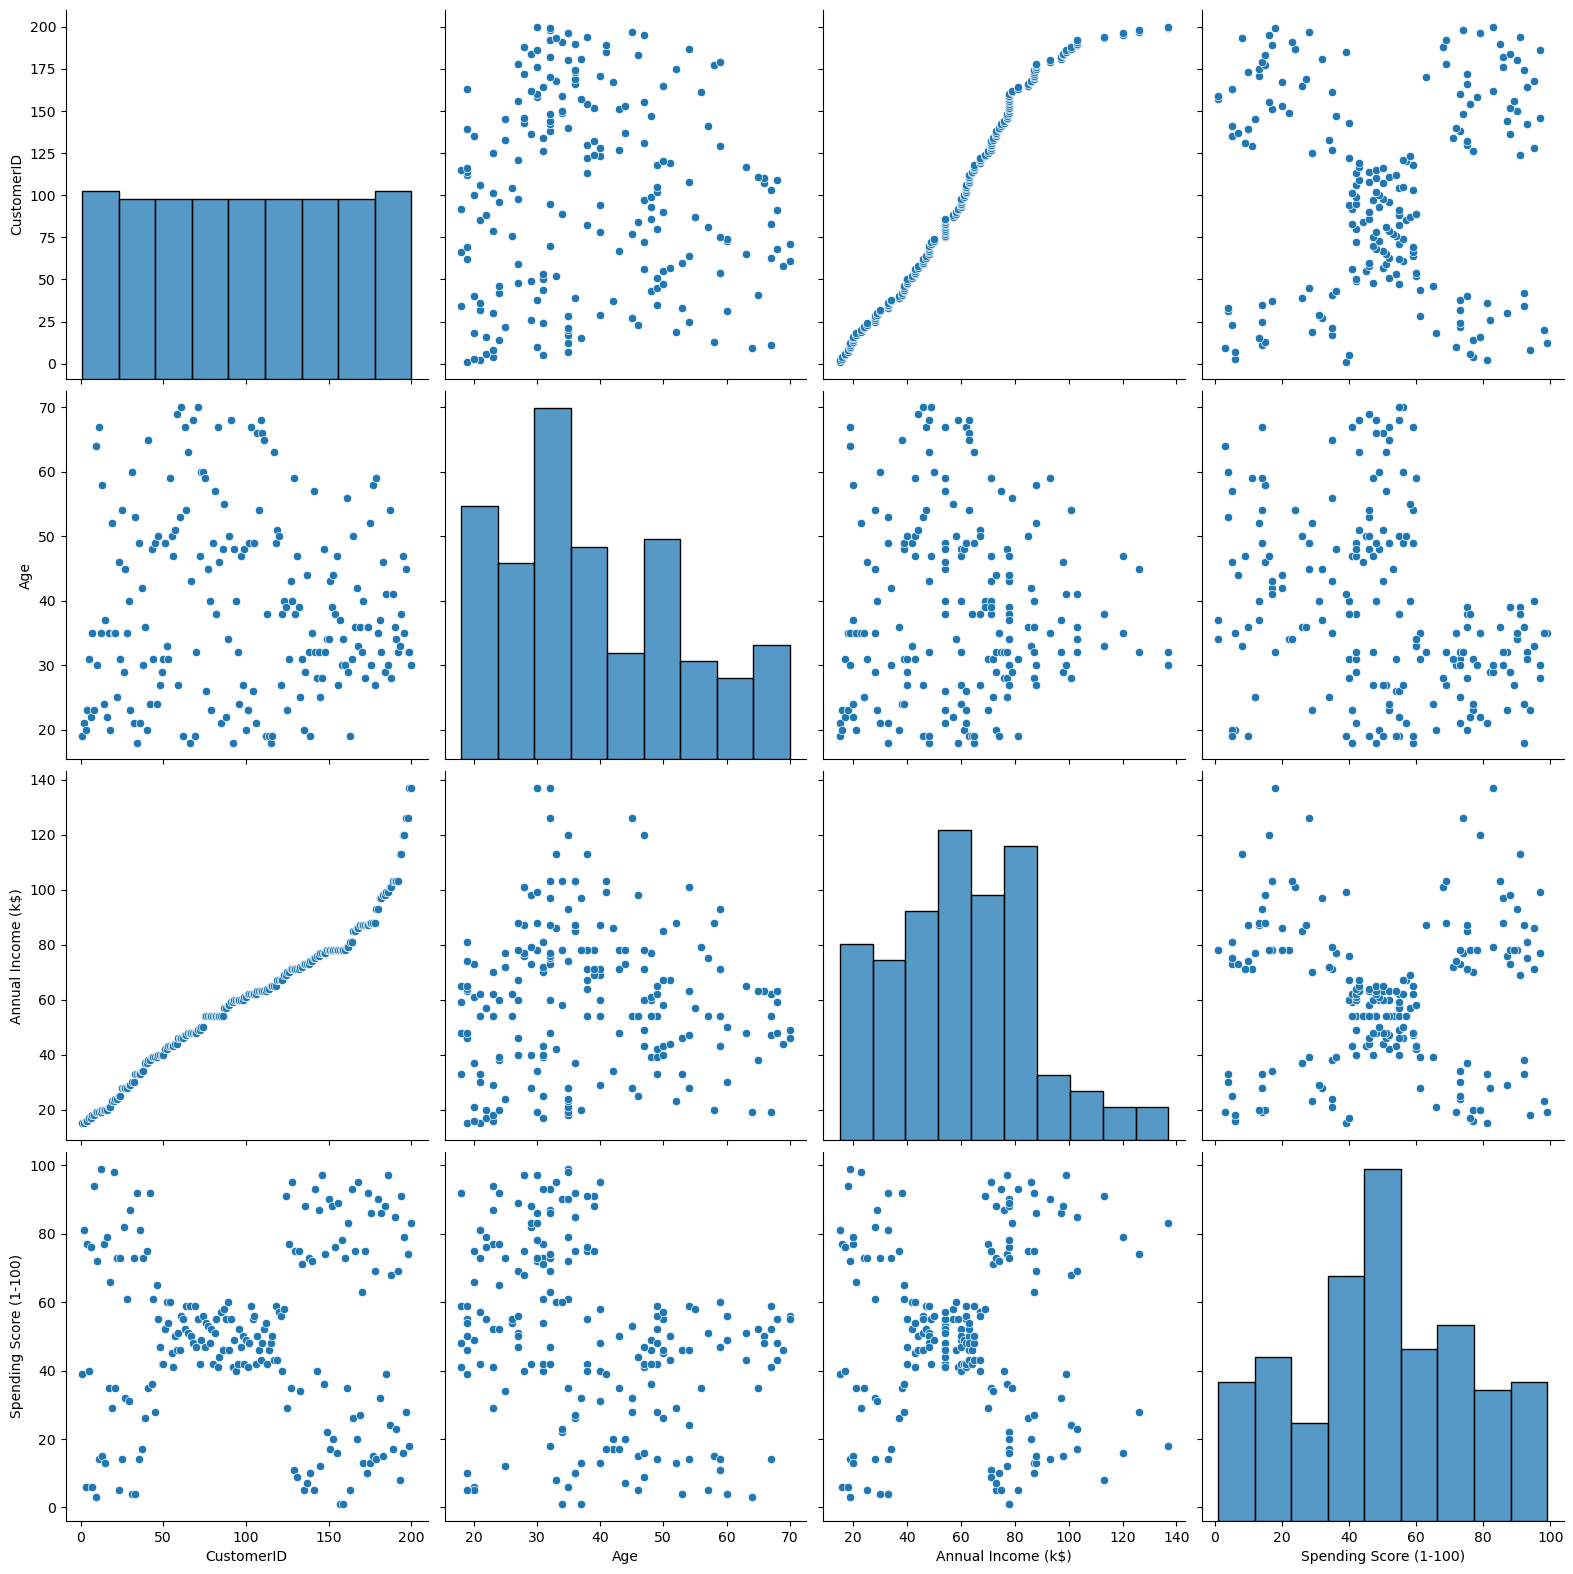

In [59]:
sns.pairplot(data.dropna(), size=4,kind='scatter') # Diagramas para analizar posibles correlaciones entre variables

In [60]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

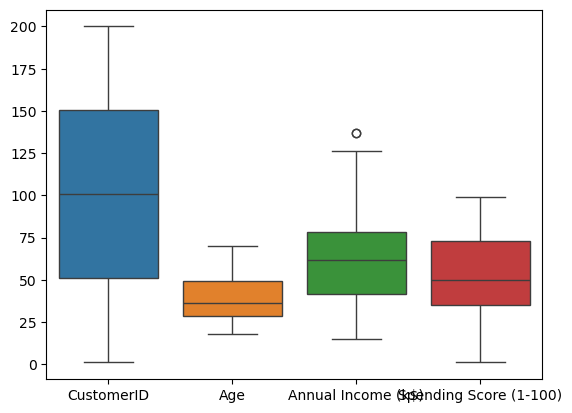

In [61]:
# Diagramas de caja para cada variable
sns.boxplot(data=data)

In [62]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


In [254]:
X.describe() # estadistica del dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,0.000000,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.723412,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-0.861706,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,0.000000,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,0.861706,7.284319e-01,6.656748e-01,8.851316e-01
max,1.723412,2.235532e+00,2.917671e+00,1.894492e+00


# 4. Entrenar el modelo configurando los diferentes hiperparámetros. K-MEANS

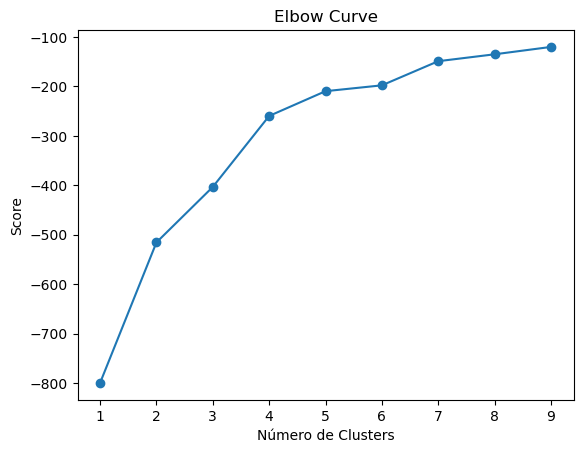

In [351]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')  # Metodo del codo, se busca donde la grafica no cambia
plt.show()

In [352]:
kmeans = KMeans(n_clusters=7).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.06522456, -0.44191719,  0.99158305,  1.23950275],
       [-0.11802837, -0.87094004, -0.09335152, -0.03882156],
       [-0.30351549,  1.24081268, -0.24772847, -0.01859824],
       [ 1.10728918,  0.20350983,  1.05609358, -1.27778394],
       [-1.32503543, -0.95652516, -1.30751869,  1.10118201],
       [-1.26729968,  1.18893483, -1.21098876, -1.29858121],
       [-1.34102379, -0.38671205, -1.31619936, -0.86183865]])

In [353]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','black','orange','yellow','blue','violet']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

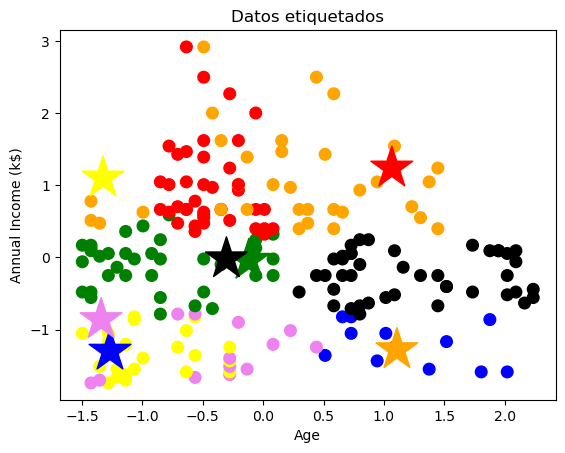

In [357]:
# 1
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

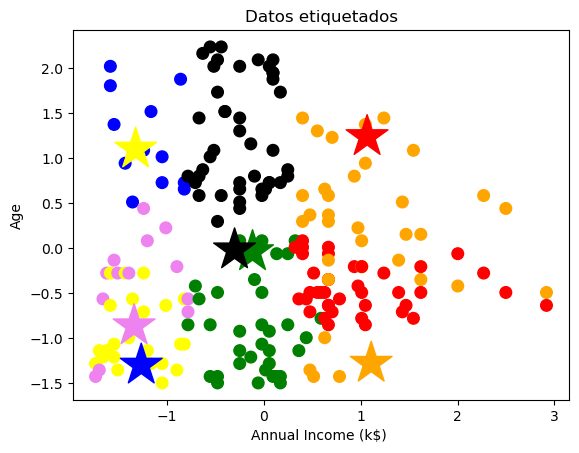

In [359]:
#2
f1 = X['Annual Income (k$)'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$) ')
plt.ylabel('Age')
plt.show()

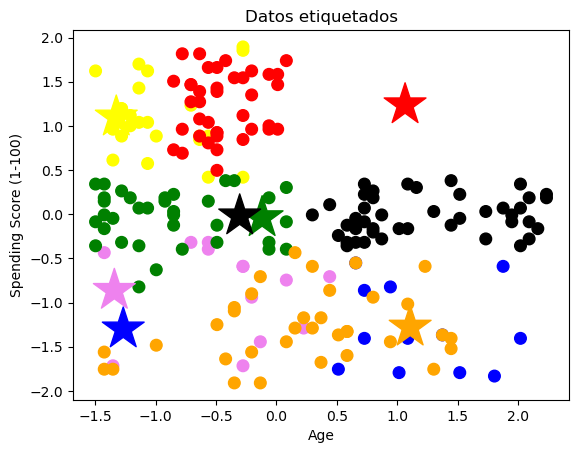

In [361]:
#3
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

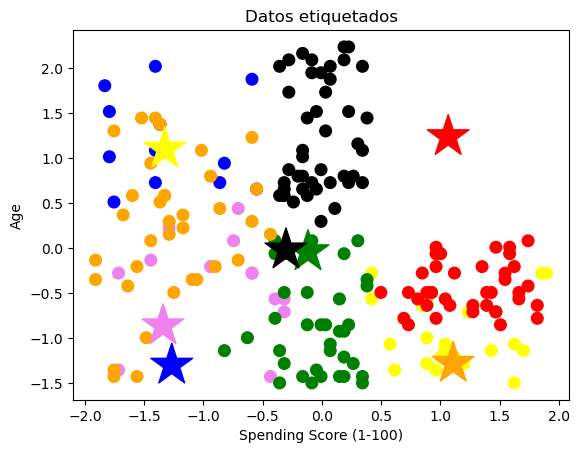

In [362]:
#4
f1 = X['Spending Score (1-100)'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()

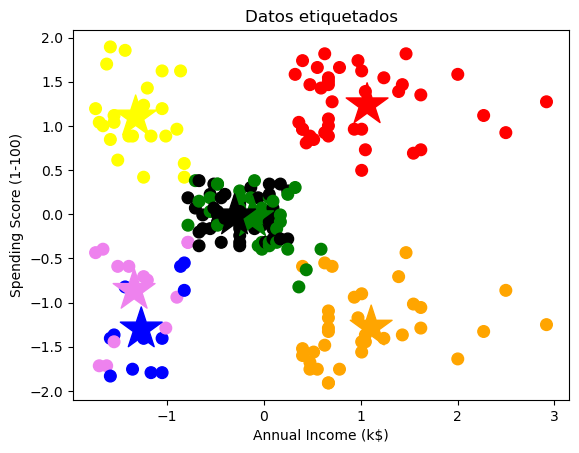

In [364]:
#5
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

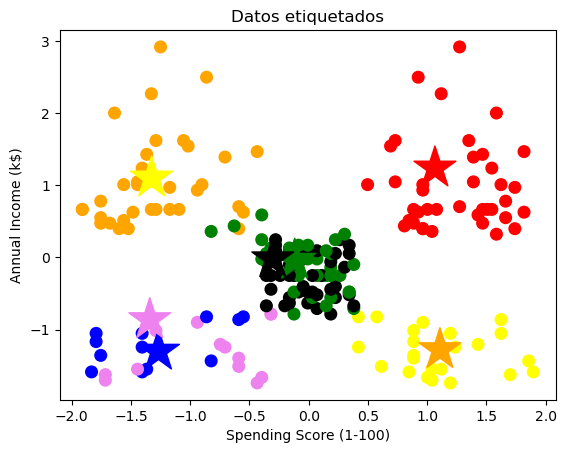

In [366]:
#6
f1 = X['Spending Score (1-100)'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [369]:
X_new = scaler.fit_transform(np.array([[0,-1.02,-2.13,-1.46]]))  # promedio de estandar?
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[1]
['green']


# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [372]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))   # ideal a 1
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels)) # separacion de los clusters
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_) # valor bajo merjor clasificacion
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))  # valor bajo mejor separacion 

Medidas de calidad para K-Means:
Puntaje de silueta: 0.42535274836148185
Índice de Calinski-Harabasz: 140.65205135468585
Inertia (suma de cuadrados dentro de los clusters): 148.90362356555534
Davies-Bouldin Index: 0.7956312676353713


# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

# 7. Interpretar, analizar y documentar los resultados obtenidos.

# Hierarchical clustering

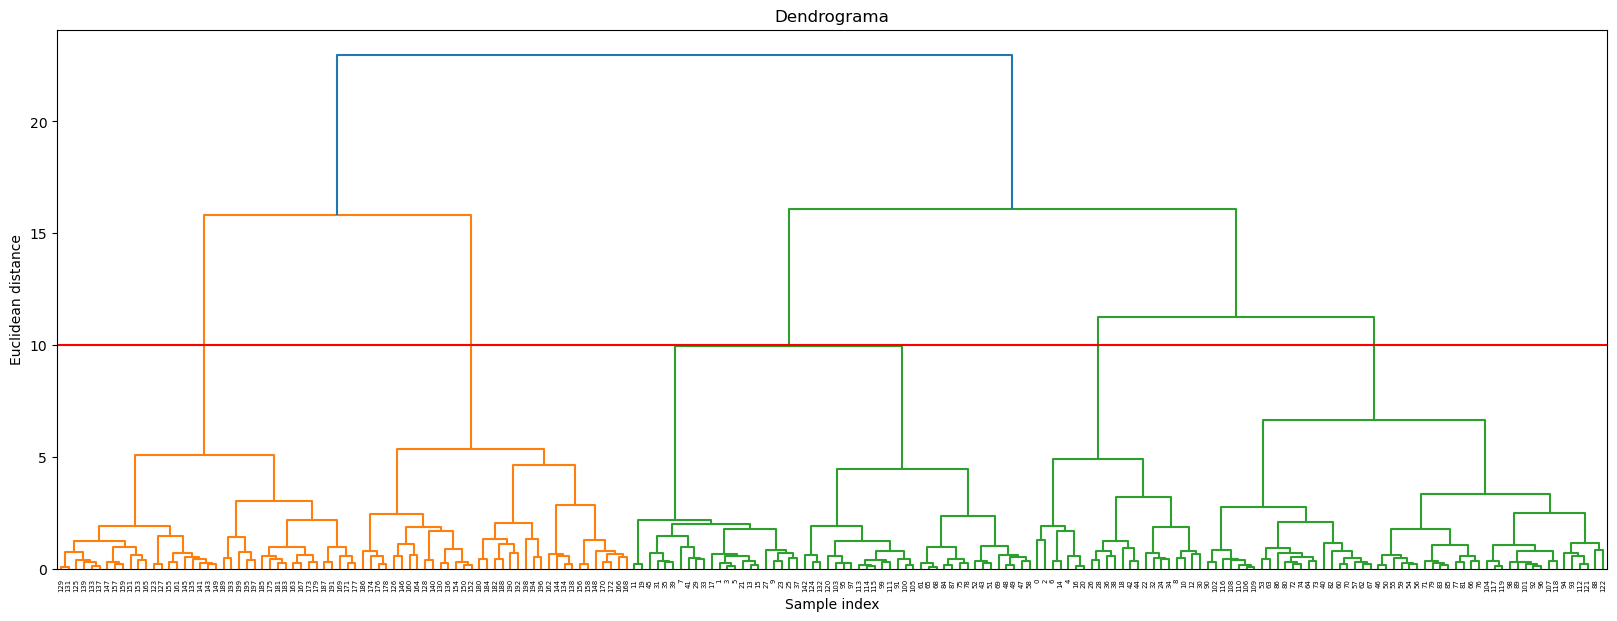

In [248]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

In [ ]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [ ]:
f1 = X['sepal_length'].values
f2 = X['sepal_width'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [ ]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

In [ ]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

In [ ]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)